In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

In [95]:
#X,Y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=11)
X,Y = make_moons(n_samples=500, shuffle=True, noise=0.2, random_state=11)

In [96]:
print(X.shape, Y.shape)

(500, 2) (500,)


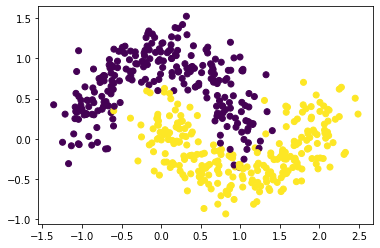

In [97]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [98]:
### model and helper functions

In [99]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [100]:
# implement perceptron learning algorithm
#learn the weights
# reduce the loss
# make the predictions

In [101]:
def predict(X, weights):
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    
    return predictions

def loss(X, Y, weights):
    #binary cross entrophy
    Y_ = predict(X, weights)
    cost = np.mean(-Y*np.log(Y_) + (1-Y)*np.log(1-Y_))
    
    return cost

def update(X, Y, weights, learning_rate):
    # perform updates for one epoch
    Y_ = predict(X, weights)
    dw = np.dot(X.T, Y_-Y)
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    
    return weights

def train(X, Y, learning_rate=0.5, maxEpochs=100):
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones, X))
    
    weights = np.zeros(X.shape[1])
    
    for epoch in range(maxEpochs):
        weights = update(X, Y, weights, learning_rate)
        
        if epoch%10 == 0:
            l = loss(X, Y, weights)
            print(l)
            
    return weights

In [102]:
weights = train(X,Y, learning_rate=0.8, maxEpochs=500)

-0.02857682754624426
-0.017277073704902876
-0.0017755949205027096
0.0025861491474295536
0.00312222759947379
0.0022003999538755723
0.0007328857244620827
-0.0008852534076536216
-0.0024751972186106883
-0.003958479953138372
-0.005305819890101633
-0.006512324941692198
-0.0075847986788121
-0.008535085331090802
-0.00937659300067291
-0.010122536161334041
-0.010785114900800252
-0.011375199104051813
-0.011902276541327445
-0.012374530517789768
-0.01279897321863183
-0.013181595261366552
-0.013527511398922047
-0.01384109314626807
-0.014126084988186523
-0.01438570388975344
-0.014622723307385834
-0.014839543500796352
-0.015038250084965888
-0.015220662668901397
-0.015388375233825517
-0.015542789677273329
-0.015685143726993894
-0.01581653422614432
-0.015937936615145244
-0.016050221286431375
-0.016154167364231198
-0.016250474359424387
-0.016339772066173278
-0.016422628999302826
-0.016499559616519797
-0.016571030525154094
-0.016637465837171347
-0.016699251807115716
-0.01675674086405673
-0.016810255129459

In [103]:
### perceptron implementation part 2
## make predictions
## visualise decision surface
## Linear vs non Linear classification

In [104]:
def getPredictions(X_Test, weights, labels=True):
    if(X_Test.shape[1] != weights.shape[0]):
        ones = np.ones((X.shape[0],1))
        X_Test = np.hstack((ones, X_Test))
        
    probs = predict(X_Test, weights)
    
    if not labels:
        return probs
    
    else:
        labels = np.zeros(probs.shape)
        labels[probs>0.5] = 1
        return labels

In [107]:
x1 = np.linspace(-2, 2, 10)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

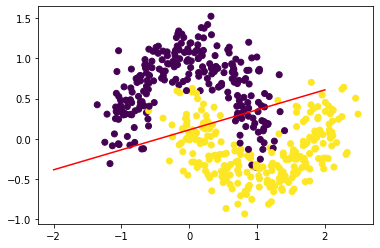

In [108]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.plot(x1, x2, color='red')
plt.show()

In [89]:
## find accuracy

In [90]:
Y_ = getPredictions(X, weights)
acc = np.sum(Y_ == Y)/Y.shape[0]

print(acc)

1.0
